In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("../DATA/Cancer.xlsx")

In [3]:
df

,Index,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
0,1,5.0,67.0,lobular,spiculated,low,1
1,2,4.0,43.0,round,circumscribed,NaN,1
2,3,5.0,58.0,irregular,spiculated,low,1
3,4,4.0,28.0,round,circumscribed,low,0
4,5,5.0,74.0,round,spiculated,NaN,1
...,...,...,...,...,...,...,...
806,807,5.0,62.0,irregular,ill-defined,iso,1
807,808,4.0,56.0,oval,circumscribed,low,0
808,809,5.0,58.0,irregular,ill-defined,low,1
809,810,4.0,NaN,round,ill-defined,low,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Index         811 non-null    int64  
 1   BI_RADS       809 non-null    float64
 2   Age           723 non-null    float64
 3   Shape         781 non-null    object 
 4   Margin        764 non-null    object 
 5   Mass_Density  735 non-null    object 
 6   Severity      811 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 44.5+ KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Index,811.0,406.000000,234.259827,1.0,203.5,406.0,608.5,811.0
BI_RADS,809.0,4.379481,1.914800,0.0,4.0,4.0,5.0,55.0
Age,723.0,55.887967,16.886616,5.0,45.0,56.0,66.0,130.0
Severity,811.0,0.459926,0.498699,0.0,0.0,0.0,1.0,1.0


In [6]:
df['Shape'].value_counts()

irregular    340
round        192
oval         177
lobular       72
Name: Shape, dtype: int64

In [7]:
df['Margin'].value_counts()

circumscribed     298
ill-defined       236
spiculated        116
obscured           97
microlobulated     17
Name: Margin, dtype: int64

In [8]:
df['BI_RADS'].value_counts()

4.0     438
5.0     312
3.0      34
2.0      13
6.0       8
0.0       3
55.0      1
Name: BI_RADS, dtype: int64

In [9]:
df.isnull().sum()

Index            0
BI_RADS          2
Age             88
Shape           30
Margin          47
Mass_Density    76
Severity         0
dtype: int64

## Before removing Outliers

<AxesSubplot:xlabel='BI_RADS'>

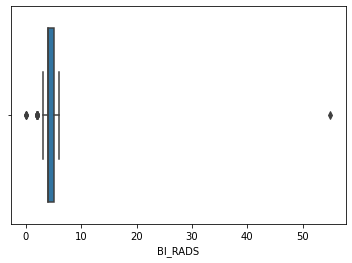

In [10]:
sns.boxplot(x=df['BI_RADS'])

### Method to Remove Outliers

In [11]:
q1 = df['BI_RADS'].quantile(.25)
q3 = df['BI_RADS'].quantile(.75)
IQR = q3 - q1
LB = q1-1.5*IQR
HB = q3+1.5*IQR
out = df[(df['BI_RADS']<LB) | (df['BI_RADS']>HB)]

In [12]:
df.drop(out.index,inplace=True)

## After Removing Outliers

<AxesSubplot:xlabel='BI_RADS'>

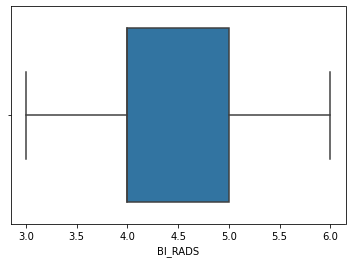

In [13]:
sns.boxplot(x=df['BI_RADS'])